In [16]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import pandas as pd
import time
import math
#Block chrome closes immediately after being launched
options = webdriver.ChromeOptions()
options.add_experimental_option("detach", True)
#Create chrome webdriver object
driver = webdriver.Chrome(options=options)

# 웹페이지 접근
url = 'https://n.news.naver.com/article/032/0003308794'
driver.get(url)
# driver.maximize_window() 
time.sleep(5)

In [2]:
# 전체 댓글 수 가져오기
review_total_cnt = int(driver.find_element(By.CSS_SELECTOR, '#comment_count').text)
print(review_total_cnt)

348


In [3]:
# 수집할 댓글 수 입력받기
message = f'총 {review_total_cnt}개의 댓글이 있습니다. 몇개의 댓글을 수집할까요?'
try:
    review_cnt = int(input(message))
    if review_cnt > review_total_cnt: # 수집할 댓글 수 > 전체 댓글 수라면
        review_cnt = review_total_cnt # 수집할 댓글수를 전체 댓글수로 지정
except:
    review_cnt = 20 # 오류 발생 시 수집할 댓글 수 20개로 지정

message = f'{review_cnt}개의 댓글을 수집하겠습니다.================='
print(message)
time.sleep(5)

55개의 댓글을 수집하겠습니다.=================


In [4]:
# 댓글 수를 클릭하면 댓글 화면으로 이동
driver.find_element(By.CSS_SELECTOR, '#comment_count').click()
time.sleep(5)

In [5]:
# 더보기 클릭
# 더보기 클릭할 때마다 20개의 댓글이 추가로 보여짐
# 더보기 클릭 횟수는? ceil(수집할 댓글 갯수/20)
pagecnt = math.ceil(review_cnt/20)-1
for i in range(pagecnt):
    driver.find_element(By.CLASS_NAME, 'u_cbox_page_more').click()
    time.sleep(1)
time.sleep(5)

### 데이터 추출

In [6]:
# 웹드라버의 html 가져와 BeautifulSoup 객체 만들기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
# print(soup)

In [7]:
# BeautifulSoup 객체에서 데이터 추출하기
reviews = soup.select('.u_cbox_area')
review_list = []
for item in reviews:
    # 날짜
    date = review.select_one('.u_cbox_date').text
    # 댓글내용
    try:
        content = review.select_one('.u_cbox_contents').text
    except:
        content = '------사용자에의해 삭제된 댓글입니다.------'
    # 좋아요갯수
    try:
        good = review.select_one('.u_cbox_cnt_recomm').text
    except:
        good = 0
    # 싫어요갯수
    try:
        bad = review.select_one('.u_cbox_cnt_unrecomm').text
    except:
        bad = 0
    review_list.append([date,content,good,bad])


### 파일에 저장

In [8]:
# 데이터프레임 생성
file_name = 'review'
df = pd.DataFrame(review_list,
             columns = ['일시','댓글내용','좋아요','싫어요']).iloc[:review_cnt]

In [9]:
# 파일명 생성
import time
import openpyxl
now = time.localtime()
filename = f'{now.tm_year}{now.tm_mon:02d}{now.tm_mday:02d}_{now.tm_hour:02d}{now.tm_min:02d}{now.tm_sec:02d}'
filename = 'files/뉴스댓글_'+filename

In [10]:
filename

'files/뉴스댓글_20240717_105959'

In [11]:
# 파일로 저장
df.to_csv(filename+'.csv', index=False)
df.to_excel(filename+'.xlsx', index=False)


In [12]:
pd.read_csv(filename+'.csv')
pd.read_excel(filename+'.xlsx')

,일시,댓글내용,좋아요,싫어요
0,2024.07.16. 15:49,각 지역 별 자치단체는 착한 가격 가게를 대대적으로 홍보하여 소비자들도 좋고 가게도...,624,18
1,2024.07.16. 17:28,"해당 식당들 모두 승승장구하길 바란다. 요즘은 맛도 없고 실속도 없는데, 무조건 1...",394,9
2,2024.07.16. 17:35,"독립문 옆 영천시장 내 도깨비 칼국수집...칼국수 4,000원 냉면(비냉, 물냉) ...",184,5
3,2024.07.16. 18:48,저거보고 폭리 취하는 몰지각 식당 등 반성하고 가격내려라,118,24
4,2024.07.16. 17:35,물가는 폭등하고있는데 술이나 퍼마시고 자빠져있는 침팬치 무리 우두머리와는 완전히 대...,134,72
5,2024.07.16. 19:52,저도 지나가다 칼국수가 4천원이라 도대체 어떻게생긴 칼국수인지 궁금해서 가봤는데 만...,28,0
6,2024.07.16. 18:23,살인적인 임대료만 확 줄어들어도 아마 거의 모든 식당이 음식값 인하가 가능할 거다,16,0
7,2024.07.16. 17:49,망하는. 가계는 다 이유가 있다 (맛이없으면서. 비싸다~~)맛있는 가계는 남들보다 ...,14,0
8,2024.07.16. 21:04,그리고 너무 싼곳은 무조건 좋아하지마라 사장님 노동력 갈아 넣어서 만든곳,12,1
9,2024.07.16. 19:03,아무근거도 없이 너도나도 가격올리는집들 많음,11,1


### 워드클라우드

In [13]:
# pip install konlpy

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50892 (\N{HANGUL SYLLABLE WEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46300 (\N

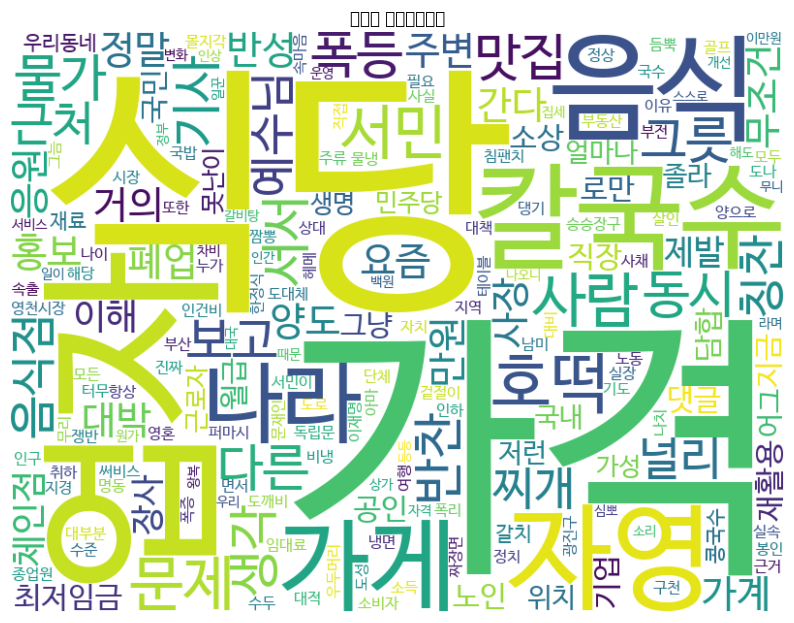

In [15]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv(filename+'.csv')

# 형태소 분석기 초기화
okt = Okt()

# 텍스트 데이터 전처리 및 명사 추출 함수
def preprocess_text(text):
    # 형태소 분석
    tokens = okt.nouns(text)
    # 한 글자 단어 제거
    tokens = [token for token in tokens if len(token) > 1]
    return tokens

# 데이터프레임의 '댓글내용' 컬럼에서 명사 추출
words = []
for text in df['댓글내용']:
    words.extend(preprocess_text(text))

# 단어 빈도수 계산
word_count = Counter(words)

# 워드클라우드 생성
wc = WordCloud(font_path='NanumBarunGothic.ttf',  # 한글 폰트 지정
               background_color='white',
               width=800,
               height=600)
wc.generate_from_frequencies(word_count)

# 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('한국어 워드클라우드')
plt.show()